In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bank_churn.csv')

In [3]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Credit_Limit,Total_Revolving_Bal
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,5,12691.0,777
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,6,8256.0,864
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,4,3418.0,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,3,3313.0,2517
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,5,4716.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,3,4003.0,1851
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,4,4277.0,2186
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,5,5409.0,0
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,4,5281.0,0


In [4]:
df.shape

(10127, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Credit_Limit              10127 non-null  float64
 11  Total_Revolving_Bal       10127 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 949.5+ KB


In [6]:
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Total_Relationship_Count        6
Credit_Limit                 6205
Total_Revolving_Bal          1974
dtype: int64

## Data Cleaning

In [7]:
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Credit_Limit                0
Total_Revolving_Bal         0
dtype: int64

In [8]:
df.duplicated().sum()

0

- Tidak ada missing values.
- Data types sudah sesuai dengan visual looking dari data tersebut.
- Tidak ada dupplikasi data
- The data is ready for exploration.

## Descriptive Statistic

In [9]:
numericals = df.select_dtypes(include=['int64','float64']).columns.tolist()
categoricals = df.select_dtypes(exclude=['int64','float64']).columns.tolist()

print(f"numericals columns are {numericals}")
print(f"categoricals columns are {categoricals}")

numericals columns are ['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Total_Relationship_Count', 'Credit_Limit', 'Total_Revolving_Bal']
categoricals columns are ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [10]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Total_Relationship_Count,Credit_Limit,Total_Revolving_Bal
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,3.812580,8631.953698,1162.814061
std,3.690378e+07,8.016814,1.298908,1.554408,9088.776650,814.987335
min,7.080821e+08,26.000000,0.000000,1.000000,1438.300000,0.000000
25%,7.130368e+08,41.000000,1.000000,3.000000,2555.000000,359.000000
50%,7.179264e+08,46.000000,2.000000,4.000000,4549.000000,1276.000000
75%,7.731435e+08,52.000000,3.000000,5.000000,11067.500000,1784.000000
max,8.283431e+08,73.000000,5.000000,6.000000,34516.000000,2517.000000


Observation :
* data tidak ada yang ekstrim
* Clientnum bisa diabaikan karena termasuk salah satu primary key yang tidak ada duplikasi di dala data nya.
* `customer_age` , `dependent_count` dan `total_relationship_count` termasuk dalam data discrete dan simetris.
* `credit_limit` dan `total_revolving_bal` termasuk dalam data continous dan bentuk skew positif (median > mean)

In [11]:
# categorical variables stats summary
df[categoricals].describe()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


Observation :
* Untuk target variable disini bisa diketahui bahwa jumlah yang tutup akun lebih sedikit dengan orang yang masih memakai akun tabungan bank.
* Mostly, gender yang menggunakan bank ini adalah perempuan,
* jenis kartu yang paling banyak digunakan adalah warna biru dengan income kurang dari `$40K`
* dan tingkat pendidikan yaitu adalah graduate

In [12]:
# frequency details for each column
for col in categoricals:
  print(f"Value counts for column {col}:")
  print(df[col].value_counts())
  print("---"*10)
  print("\n")

Value counts for column Attrition_Flag:
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
------------------------------


Value counts for column Gender:
F    5358
M    4769
Name: Gender, dtype: int64
------------------------------


Value counts for column Education_Level:
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
------------------------------


Value counts for column Marital_Status:
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
------------------------------


Value counts for column Income_Category:
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
------------------------------


Value counts for column Card_Category:
B

## Multivariate Analysis

In [13]:
df['Attrition_Flag'].replace({'Existing Customer':0,'Attrited Customer':1},inplace=True)

In [14]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Credit_Limit,Total_Revolving_Bal
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,5,12691.0,777
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,6,8256.0,864
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,4,3418.0,0
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,3,3313.0,2517
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,5,4716.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,M,2,Graduate,Single,$40K - $60K,Blue,3,4003.0,1851
10123,710638233,1,41,M,2,Unknown,Divorced,$40K - $60K,Blue,4,4277.0,2186
10124,716506083,1,44,F,1,High School,Married,Less than $40K,Blue,5,5409.0,0
10125,717406983,1,30,M,2,Graduate,Unknown,$40K - $60K,Blue,4,5281.0,0


* Existing customer adalah pengguna akun bank yang masih aktif
* Attrited customer adalah pengguna akun bank yang sudah tidak lagi aktif / tutup

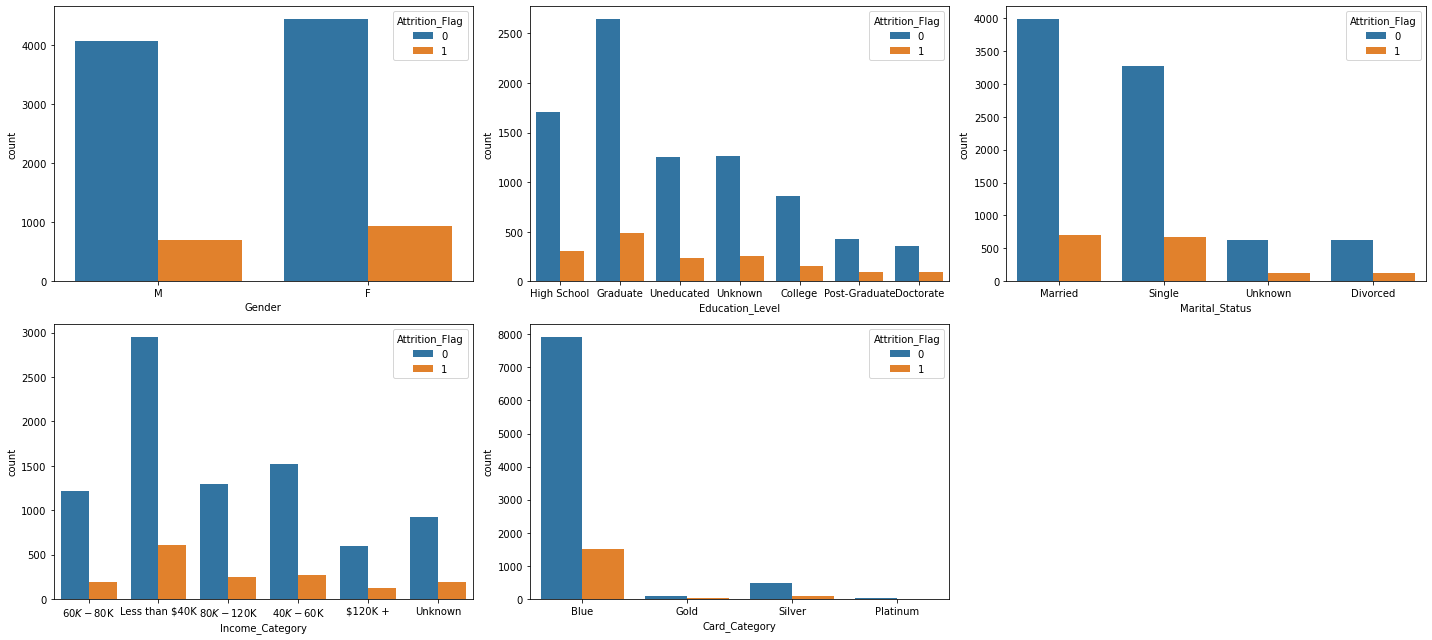

In [15]:
# set target variable (subscribed) as hue
# to understand the different behaviors of each of the features based on subscribe value

# categorical features
# excluding high cardinal features for readability
selected_categoricals = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

plt.figure(figsize=(20,9))

features = selected_categoricals
for i in np.arange(1, len(features)+1):
    plt.subplot(2, len(features)//2+1, i)
    sns.countplot(x=df[features[i-1]], hue=df['Attrition_Flag'])
    plt.xlabel(features[i-1])
    plt.tight_layout()

Oservation :
1. dari gender kecenderungan populasi yang banyak melakukan tutup akun adalah perempuan namun disini untuk populasi pengguna bank disini adalah perempuan.
2. tingkat pendidikan post graduate cenderung jarang menutup akun bank mereka.
3. kategori pendapatan disini adalah kurang dari $40K dan menyumbang pada jumlah tutup akun terbesar. (selain menjadi target untuk penggunaan bank disini namun juga mencari solusi untuk yang menutup akun mereka di bank tersebut)
4. Kartu yang paling banyak digunakan adalah berwarna biru dominan dari model kartu yang lain.
5. jumlah akun yang tutup dari status pernikahan hampir memiliki kontribusi sama antara yang sudah menikah dengan single

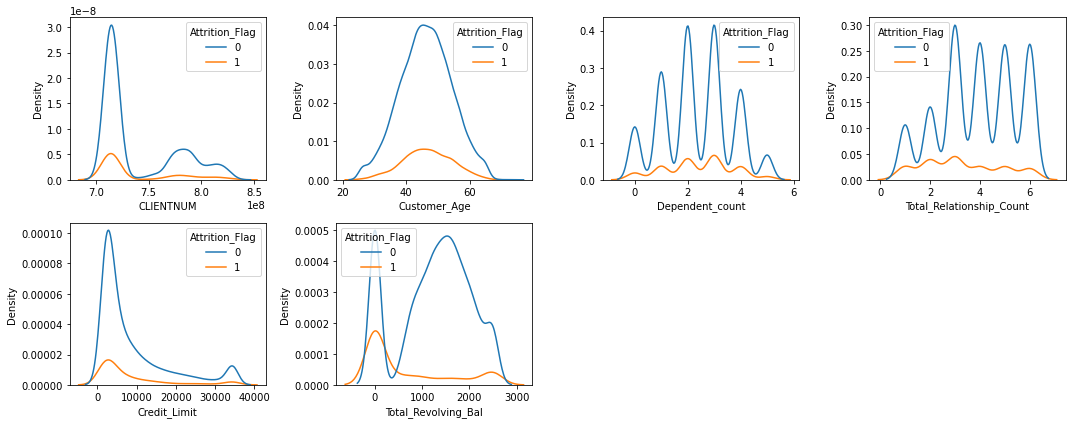

In [16]:
# do the same for numerical features

plt.figure(figsize=(15,6))

features = numericals
for i in np.arange(1, len(features)+1):
    plt.subplot(2, len(features)//2+1, i)
    sns.kdeplot(x=df[features[i-1]], hue=df['Attrition_Flag'])
    plt.xlabel(features[i-1])
    plt.tight_layout()

Conclusion : tidak ada hubungan antara numericals dengan target variable karena tidak ada dua puncak yang berbeda

<AxesSubplot:>

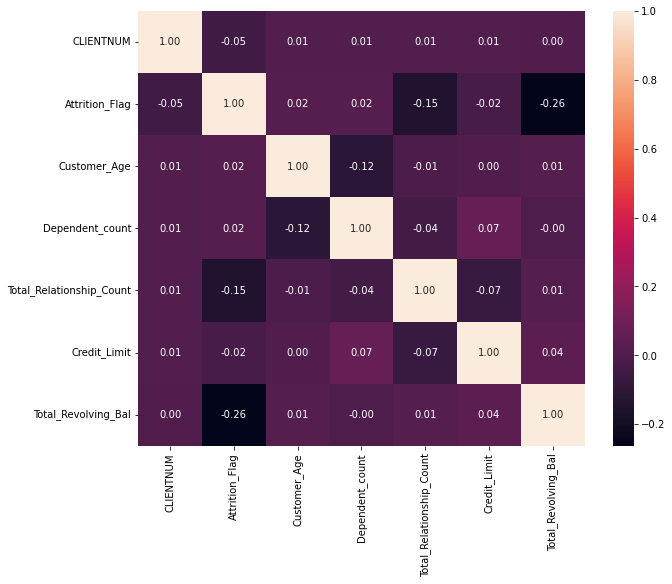

In [17]:
# heatmap correlation
plt.figure(figsize=(10,8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Observation :
* ada suatu hubungan yang lemah antara total revolving balance dengan akun yang sudah ditutup (attrition flag)

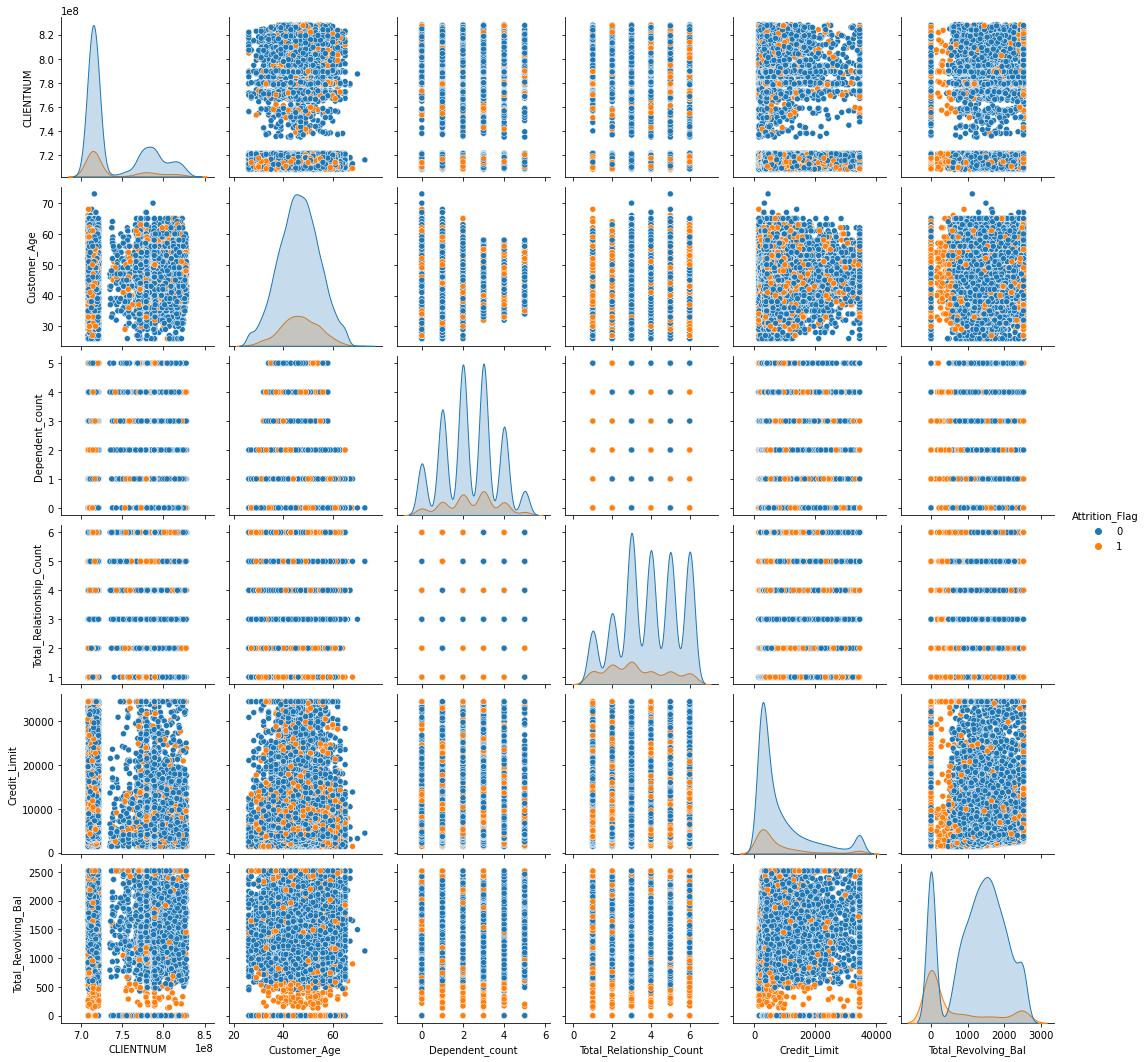

In [18]:
# pairplot 
sns.pairplot(df, hue='Attrition_Flag')

## Multivariate Analysis (Target: Attrition_Flag , Income_category)

In [19]:
print('        #######Attrition rate#######')
df.groupby(['Income_Category','Gender'])['Attrition_Flag'].mean().nlargest()

        #######Attrition rate#######


Income_Category  Gender
Less than $40K   F         0.177223
$120K +          M         0.173315
Unknown          F         0.171698
$40K - $60K      F         0.163708
$80K - $120K     M         0.157655
Name: Attrition_Flag, dtype: float64

In [20]:
print('        #######Attrition rate#######')
df.groupby(['Income_Category','Education_Level'])['Attrition_Flag'].mean().nlargest()

        #######Attrition rate#######


Income_Category  Education_Level
Less than $40K   Doctorate          0.265823
Unknown          Doctorate          0.228571
$120K +          Doctorate          0.216216
$80K - $120K     Post-Graduate      0.209877
$60K - $80K      Post-Graduate      0.207792
Name: Attrition_Flag, dtype: float64

In [21]:
print('        #######Attrition rate#######')
df.groupby(['Income_Category','Marital_Status'])['Attrition_Flag'].mean().nlargest()

        #######Attrition rate#######


Income_Category  Marital_Status
$120K +          Single            0.215328
$80K - $120K     Divorced          0.213592
Unknown          Unknown           0.207317
Less than $40K   Unknown           0.188000
$80K - $120K     Unknown           0.183824
Name: Attrition_Flag, dtype: float64

## Deep-dive analysis

1. Bagaimana profile umur antara pengguna yang masih aktif dengan yang sudah tidak aktif ?

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Customer_Age'>

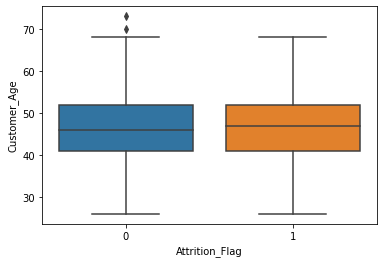

In [22]:
sns.boxplot(data = df, x = 'Attrition_Flag', y = 'Customer_Age')

2. Tingkat pendidikan manakah yang paling besar rate nya dalam menonaktifkan akun bank ?

In [23]:
user = (df.groupby(['Education_Level']).agg(
        num_Attrition_Flag = ('Attrition_Flag','sum')
        ).reset_index())
user

,Education_Level,num_Attrition_Flag
0,College,154
1,Doctorate,95
2,Graduate,487
3,High School,306
4,Post-Graduate,92
5,Uneducated,237
6,Unknown,256


3. Bagaimana profile antara credit limit yang sudah menutup akun mereka di bank ini ?

In [25]:
credit_limit_no = df.loc[df.Attrition_Flag == 1,'Credit_Limit'].describe()
df5 = pd.DataFrame(credit_limit_no).rename(columns={'Credit_Limit':'Attrition_Credit_Limit'})
df5

,Attrition_Credit_Limit
count,1627.000000
mean,8136.039459
std,9095.334105
min,1438.300000
25%,2114.000000
50%,4178.000000
75%,9933.500000
max,34516.000000


4. Bagaimana profile antara credit limit yang masih ada akun mereka di bank ini ?

In [27]:
credit_limit_yes = df.loc[df.Attrition_Flag == 0,'Credit_Limit'].describe()
df5 = pd.DataFrame(credit_limit_yes).rename(columns={'Credit_Limit':'existing_Credit_Limit'})
df5

,existing_Credit_Limit
count,8500.000000
mean,8726.877518
std,9084.969807
min,1438.300000
25%,2602.000000
50%,4643.500000
75%,11252.750000
max,34516.000000
